# Visualize

Before running this notebook, install the `tempo-embeddings` package in your local environment:

```bash
pip install .
```

See [README.dev.md](../README.dev.md) for more details.

In [1]:
%load_ext autoreload

## Load Corpus

In [2]:
from io import BytesIO
from zipfile import ZipFile
import urllib
from pathlib import Path

SEMEVAL_DATA_URL = (
    "https://www2.ims.uni-stuttgart.de/data/sem-eval-ulscd/semeval2020_ulscd_eng.zip"
)

SEMEVAL2020_DIR = Path("semeval2020_ulscd_eng")

if SEMEVAL2020_DIR.is_dir():
    print(f"Directory '{SEMEVAL2020_DIR}' already exists, skipping corpus download.")
else:
    with urllib.request.urlopen(SEMEVAL_DATA_URL) as f:
        with ZipFile(BytesIO(f.read())) as zipfile:
            zipfile.extractall()

assert SEMEVAL2020_DIR.is_dir(), f"Directory does not exist: '{SEMEVAL2020_DIR}'"

Directory 'semeval2020_ulscd_eng' already exists, skipping corpus download.


In [3]:
CORPUS1_DIR = SEMEVAL2020_DIR / "corpus1"
CORPUS2_DIR = SEMEVAL2020_DIR / "corpus2"
TRUTH_DIR = SEMEVAL2020_DIR / "truth"

assert CORPUS1_DIR.is_dir(), f"Directory does not exist: '{CORPUS1_DIR}'"
assert CORPUS2_DIR.is_dir(), f"Directory does not exist: '{CORPUS2_DIR}'"
assert TRUTH_DIR.is_dir(), f"Directory does not exist: '{TRUTH_DIR}'"

In [4]:
TOKENS_FILE1 = CORPUS1_DIR / "token" / "ccoha1.txt.gz"
TOKENS_FILE2 = CORPUS2_DIR / "token" / "ccoha2.txt.gz"

assert TOKENS_FILE1.is_file()
assert TOKENS_FILE2.is_file()

In [5]:
import gzip

with gzip.open(TOKENS_FILE1, "rt") as f:
    sentences_1810 = f.readlines()

assert len(sentences_1810) == 253644
sentences_1810[:10]

['He may find himself unexpectedly thrown into new and strange positions ; where , after looking carefully around him , he fears to move , lest by a mistaken step , he should do an injury to the cause , which he has it in his heart to serve .\n',
 'First and foremost , he drew forth from a case , in the corner of his lodgings , a brass-buttoned blue coat , of a popular cut , and fell to beating it over the shoulders and down the back with a yard stick , as if he had under his hand the body and person of his direst enemy in the world : then he twisted the right arm up and dashed at the place where the ribs might have been ; then he fell upon the breasts and pumelled them horribly ; and then , casting aside his stick , he fastened fiercely on the collar and gave the whole a mighty shaking , as if he would have the very life out of it .\n',
 '; it was in the latter city that his great discovery was first made public ; or , rather , it was there that he was first suspected of having made i

In [6]:
with gzip.open(TOKENS_FILE2, "rt") as f:
    sentences_1960 = [line.strip() for line in f]
assert len(sentences_1960) == 353692

sentences_1960[:10]

['Oui , yes , " I mumbled , the linguistic transition now in limbo . "',
 "Let 's say you are contentedly cooking hot dogs on one of the park 's rusted barbecue grills at high noon on this oven-hot day .",
 'CERTAIN KINDS of lighting refuse to lie about the relentless , ineluctableprocess of ageing .',
 "Within the first 50 yards , Diduryk 's men came under heavy fire .",
 'Second , there were significant changes in power relations within the community and between the tribal and federal governments .',
 'The hiss of the sprayer was the loudest sound in the room .',
 'I do not intend to try until the Sienese arrive here .',
 'Thus , in discussion of efficiency , the definition of output is crucial to the argument .',
 'In March he formed the Freedom Front Party and registered to participate in the elections .',
 'The contents of the report , along with a letter and attached orders from the secretary of defense , had prompted his request to have Maj. Sara Brannon report to him .']

# Load Model

In [7]:
from tempo_embeddings.embeddings.model import RobertaModelWrapper

model = RobertaModelWrapper.from_pretrained("roberta-base")

/Users/carstenschnober/Documents/SemanticsOfSustainability/workspace/tempo-embeddings/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSe

## Process Data

In [8]:
import string
from sklearn.feature_extraction import text

stopwords = set(text.ENGLISH_STOP_WORDS).union(set(string.punctuation))

In [9]:
%autoreload now

from tempo_embeddings.text.corpus import Corpus

corpus_1960 = Corpus.from_lines(sentences_1960, model=model)
print(len(corpus_1960.passages))
corpus_1960

/Users/carstenschnober/Documents/SemanticsOfSustainability/workspace/tempo-embeddings/.venv/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/carstenschnober/Documents/SemanticsOfSustainability/workspace/tempo-embeddings/.venv/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour

353692


Corpus(None, [Passage('Oui , yes , " I mumbled , the linguistic transition now in limbo . "', {}, None), Passage("Let 's say you are contentedly cooking hot dogs on one of the park 's rusted barbecue grills at high noon on this oven-hot day .", {}, None), Passage('CERTAIN KINDS of lighting refuse to lie about the relentless , ineluctableprocess of ageing .', {}, None), Passage("Within the first 50 yards , Diduryk 's men came under heavy fire .", {}, None), Passage('Second , there were significant changes in power relations within the community and between the tribal and federal governments .', {}, None), Passage('The hiss of the sprayer was the loudest sound in the room .', {}, None), Passage('I do not intend to try until the Sienese arrive here .', {}, None), Passage('Thus , in discussion of efficiency , the definition of output is crucial to the argument .', {}, None), Passage('In March he formed the Freedom Front Party and registered to participate in the elections .', {}, None), Pa

In [10]:
TERM = "efficiency"

subcorpus = corpus_1960.subcorpus(TERM, exact_match=False)
subcorpus

Corpus('efficiency', [Passage('Thus , in discussion of efficiency , the definition of output is crucial to the argument .', {}, Highlighting(start=24, end=34, umap_embedding=None)), Passage('Among the 24 Enquirer staffers eliminated in the name of efficiency were two photographers , seven newsmen , the editor of the Sunday feature page-and Managing Editor Ralph L. Holsinger .', {}, Highlighting(start=57, end=67, umap_embedding=None)), Passage('Quickly , now , beyond childlike efficiency , he tied his trouser legs protectively around the', {}, Highlighting(start=33, end=43, umap_embedding=None)), Passage('Voice mail can offer significant productivity and efficiency gains , " says Clark . "', {}, Highlighting(start=50, end=60, umap_embedding=None)), Passage('This is very important : trying to improve those two factors will improve throughput , utilization , and overall efficiency .', {}, Highlighting(start=113, end=123, umap_embedding=None)), Passage('So its Virginia facility is smaller 

In [11]:
subcorpus.compute_embeddings()

In [12]:
vectorizer = corpus_1960.tfidf_vectorizer(stop_words=list(stopwords))

/Users/carstenschnober/Documents/SemanticsOfSustainability/workspace/tempo-embeddings/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
subcorpus.topic_words(vectorizer, 10)

['efficiency',
 'inefficiency',
 'improve',
 'costs',
 'increase',
 'alliance',
 'management',
 'fuel',
 'service',
 'flexibility']

In [23]:
%autoreload now

from tempo_embeddings.text.cluster import Cluster

cluster = Cluster(subcorpus, vectorizer=vectorizer)

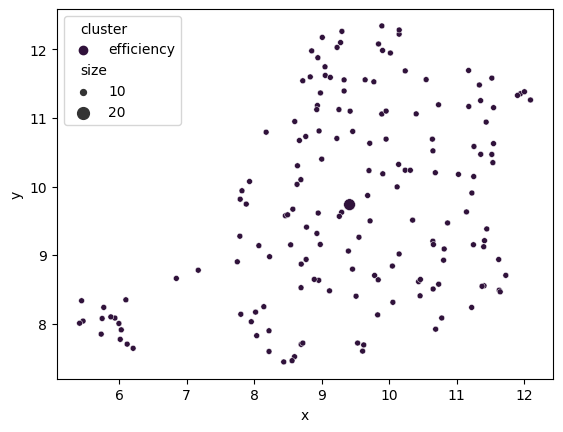

In [24]:
cluster.scatter_plot()

In [25]:
cluster.visualize()

## Cluster

In [26]:
cluster.cluster()

['improve', 'irs']

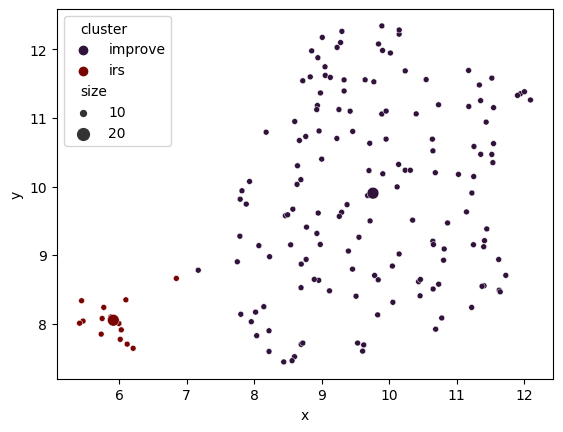

In [28]:
cluster.scatter_plot()

In [27]:
cluster.visualize()

### Refine clusters

In [29]:
cluster.cluster_subcorpus("improve")

['improve', 'fuel', 'Outliers']

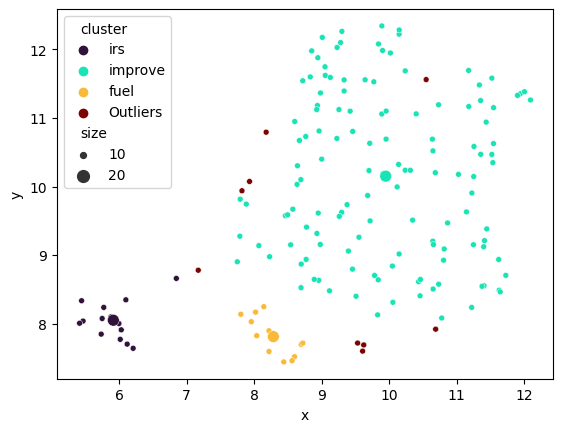

In [30]:
cluster.scatter_plot()

In [32]:
cluster.visualize()

In [33]:
cluster.cluster_subcorpus("improve")

['Outliers',
 'ariens',
 'adorna',
 'petitioner',
 'entailed',
 'percent',
 'nationalization',
 'improve',
 'rail']

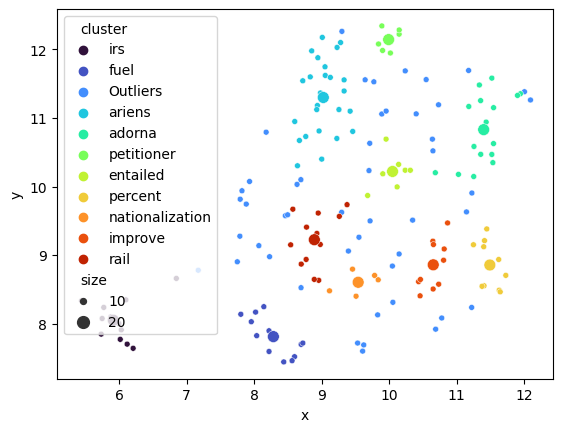

In [34]:
cluster.scatter_plot()

In [36]:
cluster.visualize()

## Wizmap

In [368]:
# %autoreload now

from tempo_embeddings.visualization.wizmap import WizmapVisualizer

if "visualizer_1960" in locals():
    visualizer_1960.cleanup()

visualizer_1960 = WizmapVisualizer(subcorpus, title="Efficiency in 1960")

In [369]:
port = 8000

visualizer_1960.visualize(port=port)

Start generating data list...
Start generating contours...
Start generating multi-level summaries...


166it [00:00, 236178.58it/s]
100%|██████████| 6/6 [00:00<00:00, 61.93it/s]

Starting server on port 8000


OSError: [Errno 48] Address already in use

# With Times

In [300]:
corpus_1810 = Corpus.from_lines(sentences_1810, model=model)
corpus_1810

Corpus(None, [Passage('He may find himself unexpectedly thrown into new and strange positions ; where , after looking carefully around him , he fears to move , lest by a mistaken step , he should do an injury to the cause , which he has it in his heart to serve .', {}, None), Passage('First and foremost , he drew forth from a case , in the corner of his lodgings , a brass-buttoned blue coat , of a popular cut , and fell to beating it over the shoulders and down the back with a yard stick , as if he had under his hand the body and person of his direst enemy in the world : then he twisted the right arm up and dashed at the place where the ribs might have been ; then he fell upon the breasts and pumelled them horribly ; and then , casting aside his stick , he fastened fiercely on the collar and gave the whole a mighty shaking , as if he would have the very life out of it .', {}, None), Passage('; it was in the latter city that his great discovery was first made public ; or , rather , it w

In [301]:
corpus_1960.set_metadatas("year", "1960")

In [302]:
corpus_1810.set_metadatas("year", "1810")

In [303]:
corpus_all = corpus_1810 + corpus_1960

In [304]:
subcorpus = corpus_all.subcorpus("efficiency", exact_match=False)

In [305]:
subcorpus.compute_embeddings()

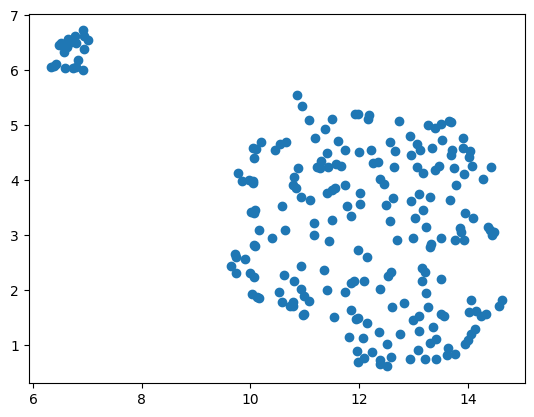

In [306]:
import matplotlib.pyplot as plt
import numpy as np


embeddings = np.array(subcorpus.umap_embeddings())
x = embeddings[:, 0]
y = embeddings[:, 1]
plt.scatter(x=x, y=y)

In [307]:
clusters = subcorpus.clusters(min_cluster_size=5)
print(len(clusters))

2


             x         y  cluster
0    13.269707  1.688321        0
1    12.083641  0.765850        0
2    14.000490  1.103395        0
3    11.347059  2.371603        0
4    13.559537  1.537529        0
..         ...       ...      ...
221   6.922188  5.994008        1
222   6.770472  6.615499        1
223   6.416648  6.106785        1
224   6.472939  6.457219        1
225   6.330418  6.052567        1

[226 rows x 3 columns]


<Axes: xlabel='x', ylabel='y'>

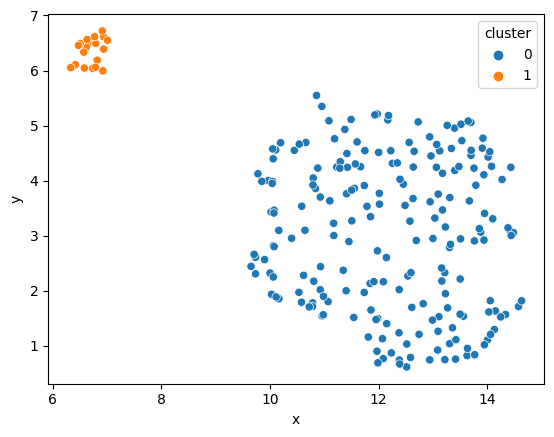

In [309]:
import pandas as pd
import seaborn as sns


rows = []

for cluster in clusters:
    embeddings = cluster.umap_embeddings()

    for embedding in embeddings:
        row = {}
        row["x"] = embedding[0]
        row["y"] = embedding[1]
        row["cluster"] = cluster.label
        rows.append(row)


data = pd.DataFrame(rows)
print(data)
sns.scatterplot(data=data, x="x", y="y", hue="cluster")

In [314]:
%autoreload now

from tempo_embeddings.visualization.wizmap import WizmapVisualizer

if "visualizer_all" in locals():
    # Cleanup previous run
    visualizer_all.cleanup()

visualizer_all = WizmapVisualizer(clusters[1], title="Efficiency in 1810 and 1960")

In [316]:
visualizer_all.visualize(port=port + 1)

Starting server on port 8001


OSError: [Errno 48] Address already in use

# Clean Up

In [317]:
if False:  # Clean up manually when needed
    visualizer_1960.cleanup()
    visualizer_all.cleanup()